In [2]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


## Exploration 03
고양이 수염 붙이기

In [3]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.10.0
19.24.2


In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [95]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [96]:
os.chdir('/content/gdrive/My Drive/Lecture/aiffel')

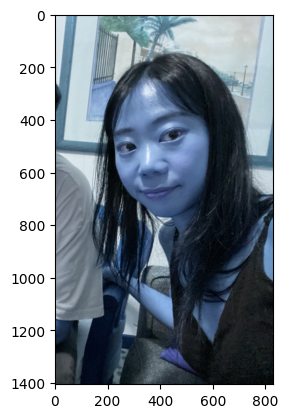

In [147]:
img_bgr = cv2.imread('IMG_7830.jpg')
plt.imshow(img_bgr)
plt.show()

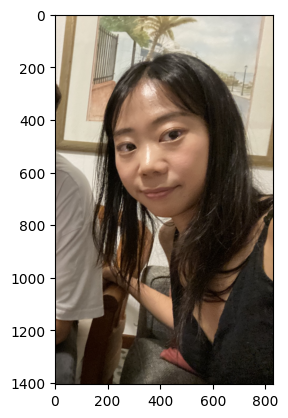

In [148]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [149]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

In [150]:
print(dlib_rects)

rectangles[[(161, 333) (546, 718)]]


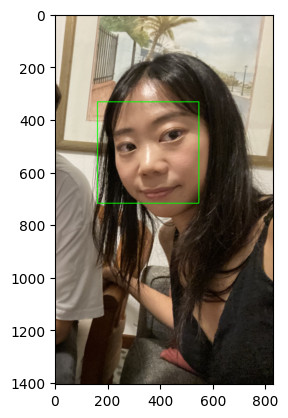

In [151]:
# 출력용 이미지
img_show = img_bgr.copy()

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [29]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d ./shape_predictor_68_face_landmarks.dat.bz2

--2025-01-24 02:24:08--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.2’

shape_predictor_68_ 100%[===================>]  61.07M  48.0MB/s    in 1.3s    

2025-01-24 02:24:09 (48.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.2’ saved [64040097/64040097]



In [30]:
model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [152]:
list_landmarks = []

for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_rgb, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


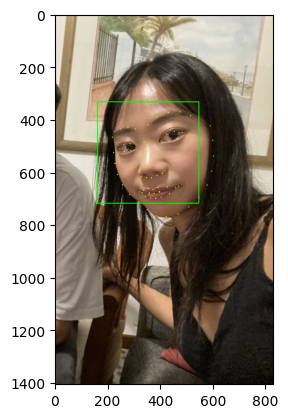

In [153]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

코 찾기

In [154]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(348, 580)
(x,y) : (348,387)
(w,h) : (386,386)


In [105]:
sticker_filename = 'cat-whiskers.png'
# img_sticker = cv2.imread(sticker_filename, cv2.IMREAD_UNCHANGED)
img_sticker = cv2.imread(sticker_filename)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
# plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
# plt.show()

(386, 386, 3)


In [86]:
if img_sticker.shape[2] == 4:  # 채널이 4개인지 확인 (RGBA)
    alpha_channel = img_sticker[:, :, 3]
    print("알파 채널 값 (0은 완전 투명, 255는 완전 불투명):")
    print(alpha_channel)  # 알파 채널 값 출력

    # 알파 채널의 최소값, 최대값 확인
    print("알파 채널 최소값:", alpha_channel.min())
    print("알파 채널 최대값:", alpha_channel.max())
else:
    print("스티커 이미지에 알파 채널이 없음")

스티커 이미지에 알파 채널이 없음


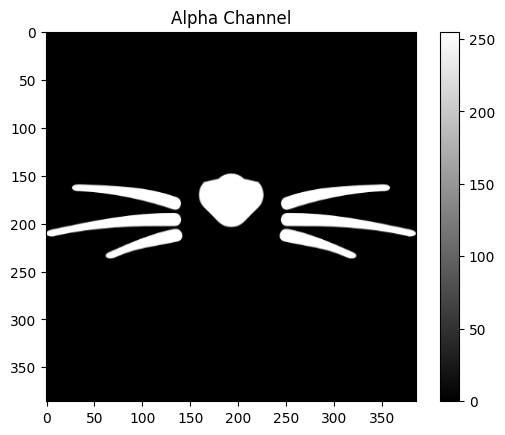

In [87]:
import matplotlib.pyplot as plt

# 알파 채널 시각화
plt.imshow(alpha_channel, cmap='gray')
plt.title("Alpha Channel")
plt.colorbar()
plt.show()

In [155]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 348
# y는 이미지에서 코 부위의 y값 = 387
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 386
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 386
refined_x = x - w // 2
refined_y = y
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (155,387)


In [156]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

# 스티커가 이미지 오른쪽으로 나갔을 때
if refined_x + img_sticker.shape[1] > img_show.shape[1]:
    excess_width = (refined_x + img_sticker.shape[1]) - img_show.shape[1]
    # 스티커의 오른쪽 부분을 잘라냄
    img_sticker = img_sticker[:, :-excess_width]

# 스티커가 이미지 아래쪽으로 나갔을 때
if refined_y + img_sticker.shape[0] > img_show.shape[0]:
    excess_height = (refined_y + img_sticker.shape[0]) - img_show.shape[0]
    # 스티커의 아래쪽 부분을 잘라냄
    img_sticker = img_sticker[:-excess_height, :]

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (155,387)


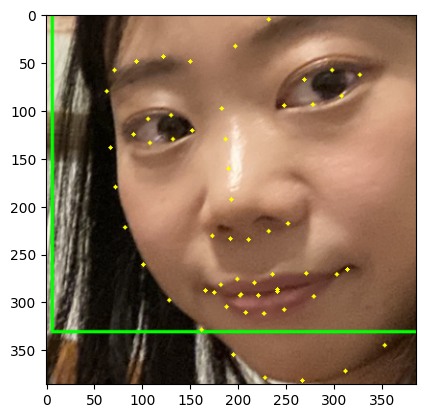

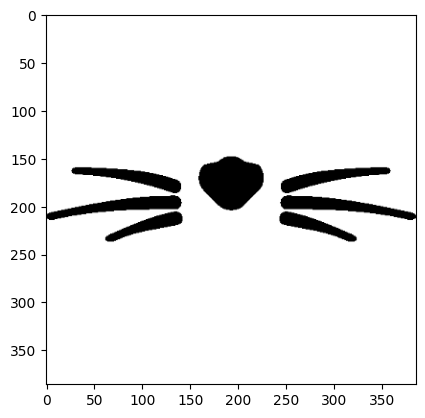

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [157]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.show()

# 고양이 수염 이미지에서는 0인 부분에 해당, 255는 배경
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))
plt.show()
print(img_sticker)

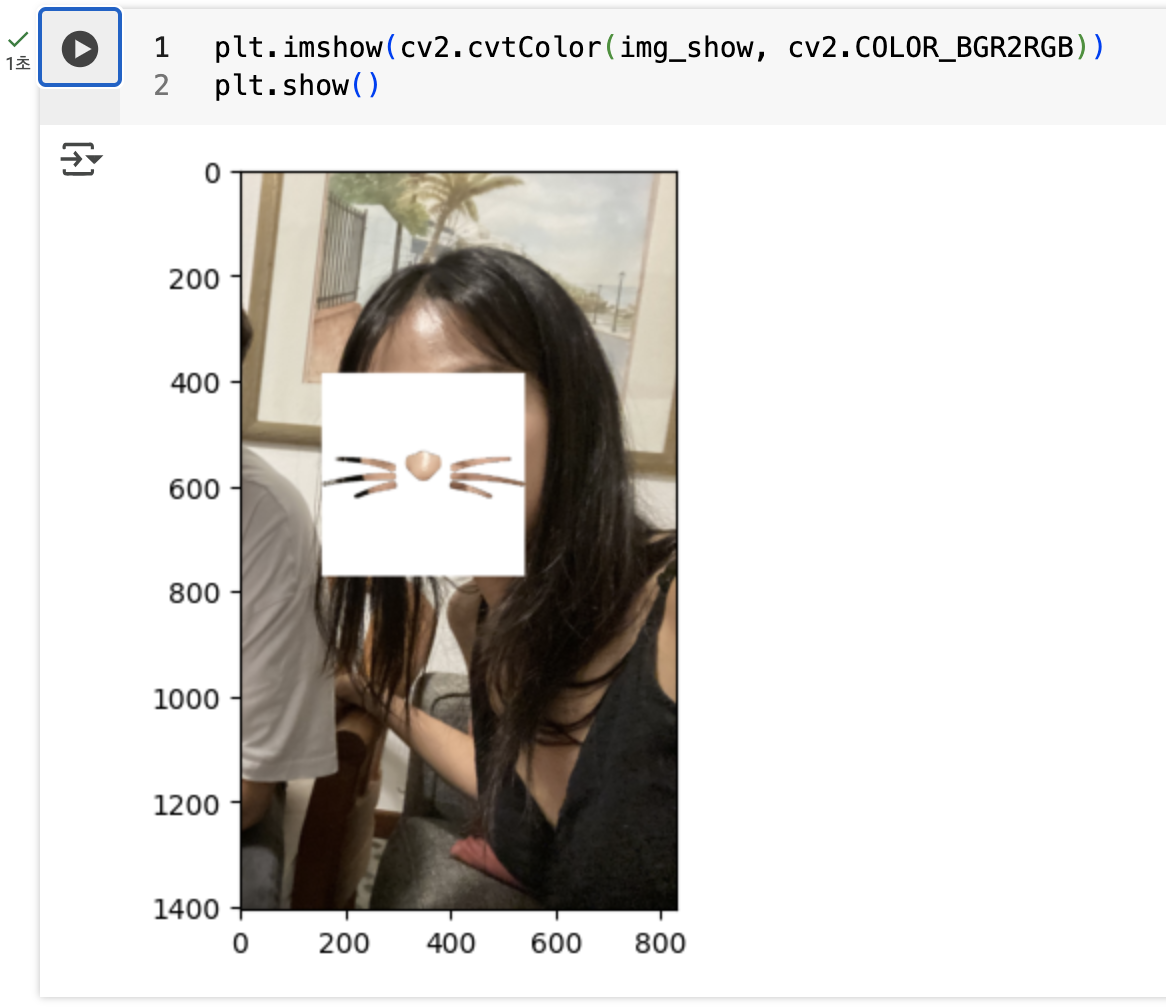

- 상황
  - 기존 코드를 사용했을 경우, 배경이 남고 수염이 사라짐
- 원인
  - 기존 코드는 img_sticker의 픽셀 값이 0이 아닐 때, 스티커를 적용해 줌.
  - 고양이 수염은 검은색이라 값이 0임
  - 따라서 반대로 적용됨
- 문제 해결
  - img_sticker 값이 0일 때, 스티커를 적용해 줌

In [158]:
# sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

# 고양이 수염 이미지에서는 0인 부분에 해당, 255는 배경 (예시랑 반대로 적용해줘야 함)
# 아래 코드에서는 img_sticker가 0일 경우에는 img_sticker(수염 이미지)를 적용하고,
# 나머지 부분은 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

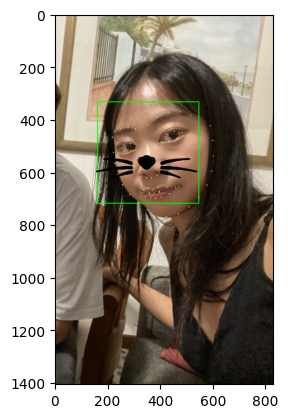

In [159]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

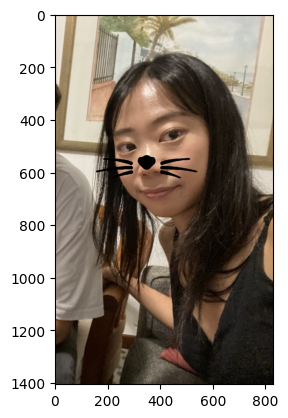

In [160]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 고양이 코를 얼굴에 맞게 살짝 회전해볼까?
![dlib_landmarks](https://ibug.doc.ic.ac.uk/media/uploads/images/annotpics/figure_68_markup.jpg)
- 37번 좌표랑 46번 좌표로 기울기를 구할 수 있지 않을까?
  - 0부터 인덱스 시작하니깐 36, 45번째 인덱스


In [170]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[36])
    left_x = landmark[36][0]
    left_y = landmark[36][1] - dlib_rect.height()//2
    print (f'left (x,y) : ({left_x},{left_y})')
    print (landmark[45])
    right_x = landmark[45][0]
    right_y = landmark[45][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print (f'right (x,y) : ({right_x},{right_y})')
    print (f'(w,h) : ({w},{h})')


(246, 512)
left (x,y) : (246,319)
(482, 450)
right (x,y) : (482,257)
(w,h) : (386,386)


In [175]:
from math import atan2, degrees
dx = right_x - left_x
dy = right_y - left_y
angle = degrees(atan2(dy, dx))

In [176]:
# 회전용 스티커 복사
rotated_img_sticker = img_sticker.copy()
(rotate_h, rotate_w) = rotated_img_sticker.shape[:2]  # 이미지 높이와 너비
# 중심 구하기
center = (rotate_w // 2, rotate_h // 2)
print(center)

(193, 193)


In [177]:
# 수염은 얼굴 각도랑 반대로 회전해줘야 하니깐 '-' 붙여줌
rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
print(rotation_matrix)

[[  0.96718062   0.25408983 -42.70519681]
 [ -0.25408983   0.96718062  55.37347569]]


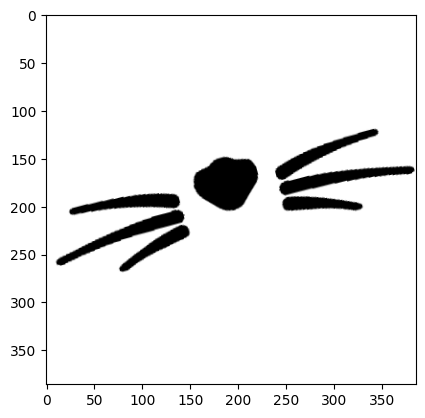

In [178]:
# 이미지 회전
rotated_img_sticker = cv2.warpAffine(rotated_img_sticker, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255, 0))
plt.imshow(cv2.cvtColor(rotated_img_sticker, cv2.COLOR_BGR2RGB))
plt.show()

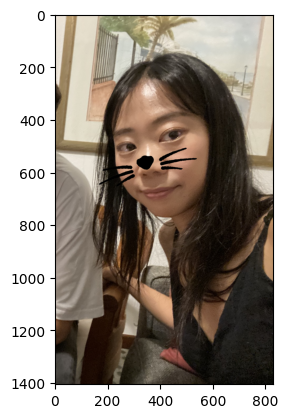

In [179]:
img_rotated = cv2.imread('IMG_7830.jpg')
sticker_area = img_rotated[refined_y:refined_y +rotated_img_sticker.shape[0], refined_x:refined_x+rotated_img_sticker.shape[1]]
img_rotated[refined_y:refined_y +rotated_img_sticker.shape[0], refined_x:refined_x+rotated_img_sticker.shape[1]] = \
    np.where(rotated_img_sticker==0,rotated_img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴이 작을 때랑 누워있을 때는,.? 선글라스 썼을 때는?!

In [180]:
os.chdir('/content/gdrive/My Drive/Lecture/aiffel')
lying_bgr = cv2.imread('IMG_7617.jpg')
small_bgr = cv2.imread('IMG_9862.jpg')
sunglasses_bgr = cv2.imread('IMG_2071.jpg')

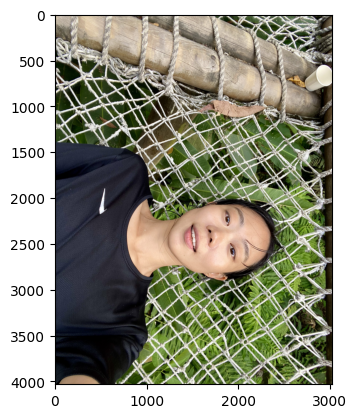

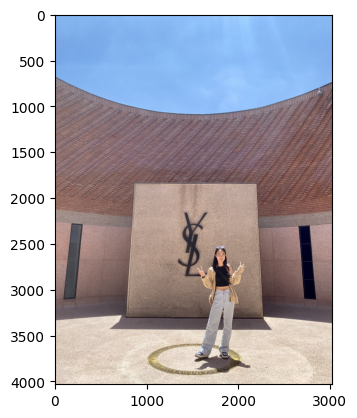

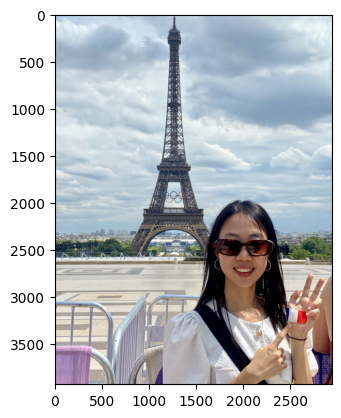

In [182]:
plt.imshow(cv2.cvtColor(lying_bgr, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(small_bgr, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(sunglasses_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [183]:
detector_hog = dlib.get_frontal_face_detector()
lying_dlib_rects = detector_hog(lying_bgr, 1)
small_dlib_rects = detector_hog(small_bgr, 1)
sunglasses_dlib_rects = detector_hog(sunglasses_bgr, 1)

print(lying_dlib_rects)
print(small_dlib_rects)
print(sunglasses_dlib_rects)

rectangles[]
rectangles[[(1752, 2600) (1859, 2708)]]
rectangles[[(1712, 2329) (2267, 2883)]]


누워있는 사진은 얼굴 인식을 못 했네

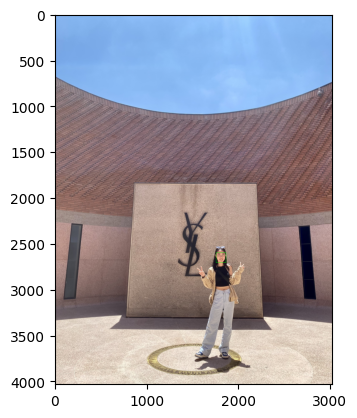

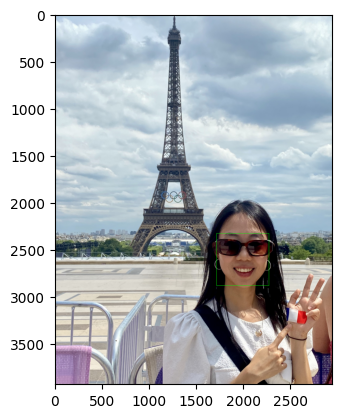

In [184]:
small_img_show = small_bgr.copy()
for dlib_rect in small_dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(small_img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

small_img_show_rgb =  cv2.cvtColor(small_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(small_img_show_rgb)
plt.show()

sngls_img_show = sunglasses_bgr.copy()
for dlib_rect in sunglasses_dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(sngls_img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

sngls_img_show_rgb =  cv2.cvtColor(sngls_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(sngls_img_show_rgb)
plt.show()

In [187]:
small_list_landmarks = []
for dlib_rect in small_dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(small_img_show_rgb, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    small_list_landmarks.append(list_points)

print(len(small_list_landmarks[0]))
print(small_list_landmarks[0])

sngls_list_landmarks = []
for dlib_rect in sunglasses_dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(sngls_img_show_rgb, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    sngls_list_landmarks.append(list_points)

print(len(sngls_list_landmarks[0]))
print(sngls_list_landmarks[0])

68
[(1754, 2626), (1756, 2641), (1760, 2656), (1763, 2669), (1769, 2681), (1778, 2691), (1789, 2699), (1800, 2705), (1811, 2707), (1821, 2704), (1829, 2696), (1836, 2687), (1843, 2677), (1847, 2665), (1849, 2652), (1850, 2638), (1850, 2623), (1765, 2616), (1771, 2609), (1781, 2606), (1790, 2607), (1799, 2611), (1815, 2610), (1823, 2607), (1832, 2606), (1840, 2609), (1844, 2616), (1808, 2624), (1809, 2633), (1810, 2643), (1811, 2652), (1799, 2658), (1805, 2659), (1810, 2660), (1815, 2659), (1819, 2657), (1777, 2626), (1782, 2623), (1788, 2623), (1794, 2627), (1788, 2628), (1782, 2627), (1819, 2628), (1825, 2623), (1830, 2623), (1836, 2625), (1831, 2627), (1825, 2628), (1788, 2672), (1797, 2668), (1805, 2667), (1811, 2668), (1816, 2667), (1823, 2668), (1829, 2670), (1823, 2681), (1817, 2685), (1811, 2686), (1805, 2685), (1797, 2682), (1790, 2672), (1805, 2671), (1811, 2672), (1816, 2671), (1827, 2670), (1816, 2679), (1810, 2680), (1805, 2679)]
68
[(1740, 2486), (1742, 2553), (1744, 2619)

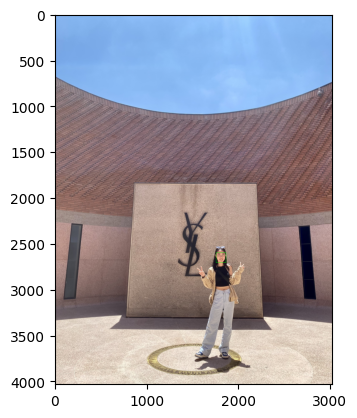

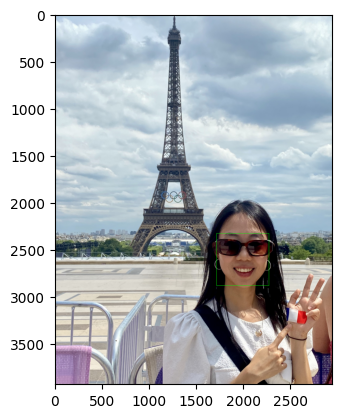

In [186]:
for landmark in small_list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

small_img_show_rgb = cv2.cvtColor(small_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(small_img_show_rgb)
plt.show()

for landmark in sngls_list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

sngls_img_show_rgb = cv2.cvtColor(sngls_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(sngls_img_show_rgb)
plt.show()

In [189]:
for dlib_rect, landmark in zip(small_dlib_rects, small_list_landmarks):
    print (landmark[30])
    small_x = landmark[30][0]
    small_y = landmark[30][1] - dlib_rect.height()//2
    small_w = small_h = dlib_rect.width()
    print (f'small (x,y) : ({small_x},{small_y})')
    print (f'small (w,h) : ({small_w},{small_h})')

for dlib_rect, landmark in zip(sunglasses_dlib_rects, sngls_list_landmarks):
    print (landmark[30])
    sngls_x = landmark[30][0]
    sngls_y = landmark[30][1] - dlib_rect.height()//2
    sngls_w = sngls_h = dlib_rect.width()
    print (f'sunglasses (x,y) : ({sngls_x},{sngls_y})')
    print (f'sunglasses (w,h) : ({sngls_w},{sngls_h})')

(1811, 2652)
small (x,y) : (1811,2598)
small (w,h) : (108,108)
(2008, 2598)
sunglasses (x,y) : (2008,2321)
sunglasses (w,h) : (556,556)


In [190]:
sticker_filename = 'cat-whiskers.png'
img_sticker = cv2.imread(sticker_filename)
small_img_sticker = cv2.resize(img_sticker, (small_w,small_h))
sngls_img_sticker = cv2.resize(img_sticker, (sngls_w,sngls_h))

In [191]:
small_x = small_x - small_w // 2
small_y = small_y
print (f'small (x,y) : ({small_x},{small_y})')

sngls_x = sngls_x - sngls_w // 2
sngls_y = sngls_y
print (f'sunglasses (x,y) : ({sngls_x},{sngls_y})')

small (x,y) : (1757,2598)
sunglasses (x,y) : (1730,2321)


In [192]:
if small_x < 0:
    small_img_sticker = small_img_sticker[:, -small_x:]
    small_x = 0
if small_y < 0:
    small_img_sticker = small_img_sticker[-small_y:, :]
    small_y = 0

print ('(x,y) : (%d,%d)'%(small_x, small_y))

if sngls_x < 0:
    sngls_img_sticker = sngls_img_sticker[:, -sngls_x:]
    sngls_x = 0
if sngls_y < 0:
    sngls_img_sticker = sngls_img_sticker[-sngls_y:, :]
    sngls_y = 0

print ('(x,y) : (%d,%d)'%(sngls_x, sngls_y))

(x,y) : (1757,2598)
(x,y) : (1730,2321)


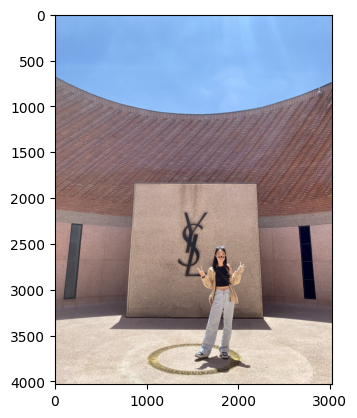

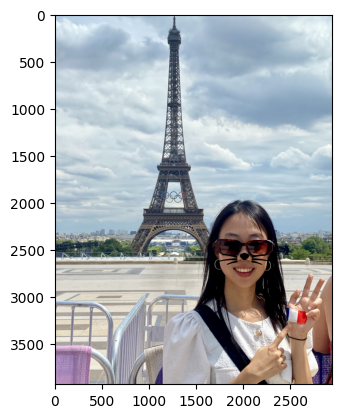

In [195]:
small_sticker_area = small_bgr[small_y:small_y +small_img_sticker.shape[0], small_x:small_x+small_img_sticker.shape[1]]
small_bgr[small_y:small_y +small_img_sticker.shape[0], small_x:small_x+small_img_sticker.shape[1]] = \
    np.where(small_img_sticker==0,small_img_sticker,small_sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(small_bgr, cv2.COLOR_BGR2RGB))
plt.show()

sngls_sticker_area = sunglasses_bgr[sngls_y:sngls_y +sngls_img_sticker.shape[0], sngls_x:sngls_x+sngls_img_sticker.shape[1]]
sunglasses_bgr[sngls_y:sngls_y +sngls_img_sticker.shape[0], sngls_x:sngls_x+sngls_img_sticker.shape[1]] = \
    np.where(sngls_img_sticker==0,sngls_img_sticker,sngls_sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(sunglasses_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 얼굴이 작은건 레졸루션이 좋아서 인식이 잘 된 듯
- 모델이 선글라스 낀 얼굴도 학습하는 듯

### 너무 귀찮네.. 함수화하자
- Pseudo code
```
def apply_cat_sticker(image, sticker):
  # 1. 이미지에서 얼굴 추출
  faces = get_faces(image)
  # 2. 랜드마크 추출
  landmarks = get_landmarks(faces)
  # 3. 코 좌표 찾기
  noses = calculate_noses(landmarks)
  # 4. 각도 계산
  angles = calculate_angles(landmarks)
  # 5. 스티커 붙이기
  attached_image = attach_cat_sticker(image, sticker, angles)
  return attached_image
```

In [258]:
"""Detect the human faces using dlib face detector

Parameters
----------
image : rgb image - if using opencv, you might need to convert to rgb

Raises
------
Exception : if no face is detected, raise an exception
"""
def get_faces(image):
  detector_hog = dlib.get_frontal_face_detector()
  dlib_rects = detector_hog(image, 1)
  if len(dlib_rects) < 1:
    raise Exception(f'Cannot find the face.')

  return dlib_rects

In [260]:
"""Detect the face landmarks using dlib shape predictor

Parameters
----------
image      : rgb image - if using opencv, you might need to convert to rgb
dlib_rects : face bounding boxes from get_faces() method

Raises
------
Exception : if model cannot predict landmarks, raise an exception
Exception : each landmark using shape predictor always has 68 of face landmarks
"""
def get_landmarks(image, dlib_rects):
  landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
  list_landmarks = []

  for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(image, dlib_rect)
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

  if len(list_landmarks) < 1:
    raise Exception(f'Cannot find the landmarks.')

  if len(list_landmarks[0]) != 68:
    raise Exception(f'Invalid landmarks.')

  return list_landmarks

In [295]:
"""Calculate each nose points of the faces

Parameters
----------
dlib_rects : face bounding boxes from get_faces() method
landmarks  : face landmarks from get_landmarks() method
"""
NUM_NOSE = 30
def calculate_noses(dlib_rects, list_landmarks):
  noses = []
  for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    nose = {}
    nose['x'] = landmark[30][0]
    nose['y'] = landmark[30][1] - dlib_rect.height()//2
    nose['w'] = nose['h'] = dlib_rect.width()
    noses.append(nose)

  return noses

In [300]:
"""Calculate each angle of the faces

Parameters
----------
dlib_rects : face bounding boxes from get_faces() method
landmarks  : face landmarks from get_landmarks() method
"""
from math import atan2, degrees

NUM_LEFT_EYE = 36
NUM_RIGHT_EYE = 45
def calculate_angles(dlib_rects, list_landmarks):
  angles = []

  for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    l_eye_x = landmark[NUM_LEFT_EYE][0]
    l_eye_y = landmark[NUM_LEFT_EYE][1] - dlib_rect.height()//2

    r_eye_x = landmark[NUM_RIGHT_EYE][0]
    r_eye_y = landmark[NUM_RIGHT_EYE][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()

    dx = r_eye_x - l_eye_x
    dy = r_eye_y - l_eye_y
    angle = degrees(atan2(dy, dx))
    angles.append(angle)

  return angles

In [252]:
"""Return RGB list of the input color

Parameters
----------
color : string value
"""
def get_color_code(color):
  rgb = [0, 0, 0]
  if color == 'red':
    rgb = [0, 0, 255]
  elif color == 'green':
    rgb = [0, 255, 0]
  elif color == 'blue':
    rgb = [255, 0, 0]
  elif color == 'pink':
    rgb = [207, 198, 251]
  else:
    rgb = [0, 0, 0]
  return rgb

In [301]:
def attach_stickers(image, sticker, noses, angles, color='none'):
  if len(noses) != len(angles):
    raise Exception(f'Invalid paramters, noses len: {len(noses)}, angles len: {len(angles)}')

  num_of_faces = len(noses)
  image_show = image.copy()

  for i in range(num_of_faces):
    ### sticker resize ###
    nose = noses[i]
    image_sticker = cv2.resize(sticker, (nose['w'],nose['h']))
    # target location
    x = nose['x'] - nose['w'] // 2
    y = nose['y']

    ### sticker rotate ###
    angle = angles[i]
    # 스티커의 높이와 너비
    (rotate_h, rotate_w) = image_sticker.shape[:2]
    center = (rotate_w // 2, rotate_h // 2)
    # 수염은 얼굴 각도랑 반대로 회전해줘야 하니깐 '-' 붙여줌
    rotation_matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)
    image_sticker = cv2.warpAffine(image_sticker, rotation_matrix,(nose['w'], nose['h']),
                                   flags=cv2.INTER_LINEAR,
                                   borderMode=cv2.BORDER_CONSTANT,
                                   borderValue=(255, 255, 255, 0))

    ### sticker omit ###
    # 이미지가 왼쪽이랑 위쪽으로 나갔을 때
    if x < 0:
      image_sticker = image_sticker[:, -x:]
      x = 0
    if y < 0:
      image_sticker = image_sticker[-y:, :]
      y = 0

    # 이미지가 오른쪽이랑 아래쪽으로 나갔을 때
    if x + image_sticker.shape[1] > image_show.shape[1]:
      excess_width = (x + image_sticker.shape[1]) - image_show.shape[1]
      image_sticker = image_sticker[:, :-excess_width]

    if y + image_sticker.shape[0] > image_show.shape[0]:
      excess_height = (y + image_sticker.shape[0]) - image_show.shape[0]
      image_sticker = image_sticker[:-excess_height, :]

    ### 이미지에 스티커 삽입 ###
    # rgb 색깔
    sticker_color = get_color_code(color)
    # apply
    sticker_area = image_show[y:y+image_sticker.shape[0], x:x+image_sticker.shape[1]]
    image_show[y:y +image_sticker.shape[0], x:x+image_sticker.shape[1]] = \
      np.where(image_sticker==0,sticker_color,sticker_area).astype(np.uint8)

  return image_show


In [302]:
def apply_cat_sticker(image, sticker, color='none'):
  # 1. 이미지에서 얼굴 추출
  faces = get_faces(image)
  # 2. 랜드마크 추출
  landmarks = get_landmarks(image, faces)
  # 3. 코 좌표 찾기
  noses = calculate_noses(faces, landmarks)
  # 4. 각도 계산
  angles = calculate_angles(faces, landmarks)
  # 5. 스티커 붙이기
  attached_image = attach_stickers(image, sticker, noses, angles, color)
  return attached_image

In [303]:
# 함수 테스트
test_image = cv2.imread('IMG_7830.jpg')
test_sticker = cv2.imread('cat-whiskers.png')

image_with_sticker = apply_cat_sticker(test_image, test_sticker, 'pink')

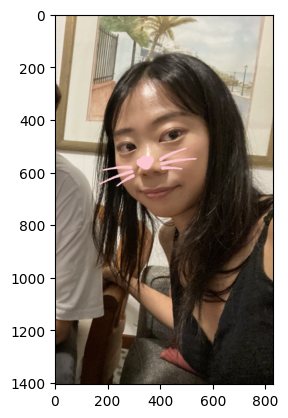

In [299]:
plt.imshow(cv2.cvtColor(image_with_sticker, cv2.COLOR_BGR2RGB))
plt.show()

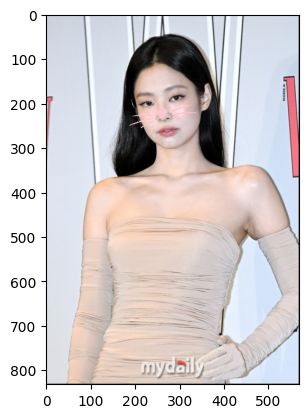

In [304]:
test_one = cv2.imread('jenny.jpeg')
one_sticker = apply_cat_sticker(test_one, test_sticker, 'pink')
plt.imshow(cv2.cvtColor(one_sticker, cv2.COLOR_BGR2RGB))
plt.show()

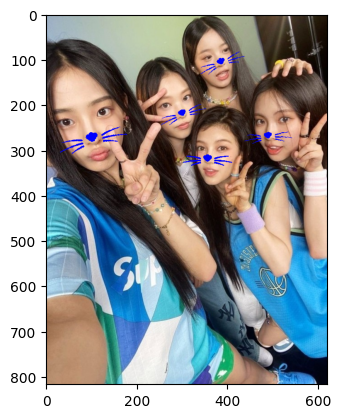

In [306]:
# 여러명 테스트
test_multi = cv2.imread('test_multipeople.jpeg')
test_multi_sticker = apply_cat_sticker(test_multi, test_sticker, 'blue')
plt.imshow(cv2.cvtColor(test_multi_sticker, cv2.COLOR_BGR2RGB))
plt.show()

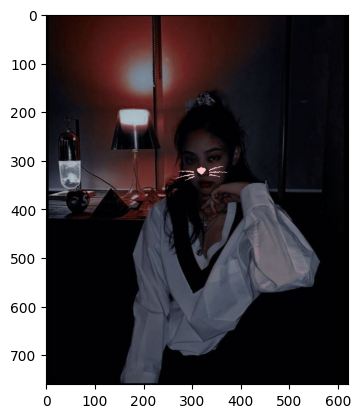

In [308]:
test_one = cv2.imread('dark_jenny.jpeg')
one_sticker = apply_cat_sticker(test_one, test_sticker, 'pink')
plt.imshow(cv2.cvtColor(one_sticker, cv2.COLOR_BGR2RGB))
plt.show()

## 회고
### 여러 사진 테스트해보기
- 멀리 떨어진 사진 : 얼굴이 잘 감지됨 - 아마 레졸루션이 높아서 (사진이 커서..) 그렇지 않을까?
- 선글라스 낀 사진 : 얼굴이 잘 감지됨, 이미 모델이 많이 학습한 듯
- 누워있는 사진 : 얼굴이 감지가 되지 않아 실험이 불가하였음
- 여러 명 있는 사진 : 한 명씩 잘 감지
- 어두운 사진 : 잘 감지

### 코드 작성
- 처음에 기존 코드를 copy+paste하여 테스트하다 보니 흰 배경만 남는 문제에 직면
  - 알파 채널도 출력해보고 했으나 결국 문제는 코드
  - 코드를 목표에 맞게 수정하여 해결
  - 이 부분을 활용하여 수염 색깔을 바꾸는 코드를 작성할 수 있었음
- 함수화 과정에서 `get_noses()`와 `get_angles()` 파라미터에 오타가 있었음
  - 원래 이미지 외에 감지가 잘 안됨
  - 하나씩 출력해보다가 오타를 인지함
  - 수정 ㅎ..ㅠ

### 이걸 어플로 만든다면..?
- 코랩에서 실험하였는데 cpu 상에서 진행했음에도 나쁘지 않은 속도였음
- 근데 실시간 어플을 만든다면 약간의 버벅거림이 있을 것으로 생각
- 스티커마다 얼굴에 붙이는 위치가 다를텐데 꽤나 번거로울 것 같음
- 원하는 위치에 정확히 붙지 않으면 좀 웃길수도..?